In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/content/drive/MyDrive/SementesAbobora.xlsx')

In [3]:
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,(A) Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,(A) Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,(A) Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,(A) Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,(A) Çerçevelik


In [4]:
df.shape
#ver linhas e colunas
#deep learning com dados de alta complexidade, 2M de linhas, volume grande
#número alto de linhas também

(2500, 13)

In [5]:
df.tail()
#mostra as últimas linhas

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,(B) Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,(B) Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,(B) Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,(B) Ürgüp Sivrisi
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,(B) Ürgüp Sivrisi


In [6]:
from sklearn.utils import shuffle

df = shuffle(df)

In [7]:
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
1952,78540,1077.186,424.9388,236.0232,79211,316.2281,0.8316,0.9915,0.7356,0.8506,1.8004,0.7442,(B) Ürgüp Sivrisi
2329,92115,1170.353,466.4165,251.8191,92719,342.4682,0.8417,0.9935,0.6931,0.8451,1.8522,0.7343,(B) Ürgüp Sivrisi
1886,80264,1192.884,507.3202,202.5243,80991,319.6800,0.9169,0.9910,0.5333,0.7088,2.5050,0.6301,(B) Ürgüp Sivrisi
579,66692,988.604,380.9275,224.1739,67373,291.4016,0.8085,0.9899,0.7302,0.8575,1.6993,0.7650,(A) Çerçevelik
1377,78143,1104.639,442.4214,225.3370,78808,315.4279,0.8606,0.9916,0.7405,0.8047,1.9634,0.7130,(B) Ürgüp Sivrisi


In [8]:
#saber a quantidade por variável da coluna target
df['Class'].value_counts(normalize=True)

#não precisa trablhar com nenhuma técnica de oversampling

,proportion
Class,
(A) Çerçevelik,0.52
(B) Ürgüp Sivrisi,0.48


In [9]:
#explorar os dados

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


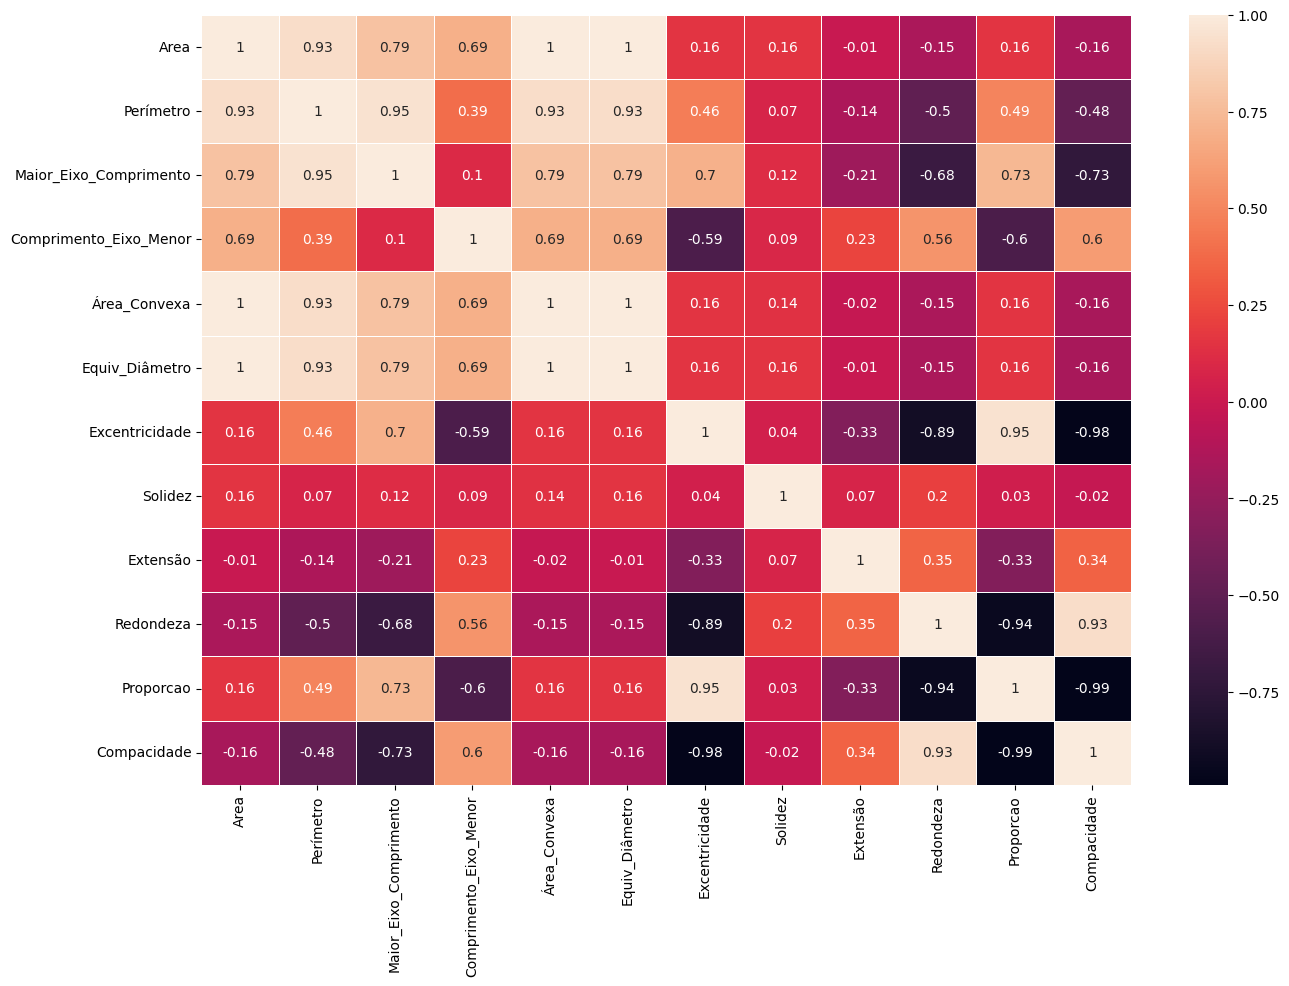

In [10]:
#selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

#calular a matriz de correlação
correlation_matrix = numeric_df.corr().round(2)
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

#variáveis com maior de 0.90 é bom selecionar apenas uma para não atrapalhar os modelos

In [11]:
#representação de 0 e 1 para a variável target que está em string
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Class = le.fit_transform(df['Class'])

In [12]:
#quais os dados distintos temos na coluna (representação binária)
set(df['Class'])

{0, 1}

In [13]:
x = df[['Area', 'Perímetro', 'Comprimento_Eixo_Menor', 'Excentricidade', 'Solidez', 'Extensão', 'Redondeza', 'Proporcao', 'Compacidade']]
y = df['Class']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [15]:
#normalizando os dados, minimos e máximos de todas as variáveis para normalizar, colocar na mesma régua

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [16]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train

array([[0.58837241, 0.6287191 , 0.54105628, ..., 0.46006784, 0.56656812,
        0.29119442],
       [0.36397916, 0.56343783, 0.2223402 , ..., 0.12704286, 0.87703563,
        0.07207207],
       [0.48456282, 0.468186  , 0.63256705, ..., 0.64384829, 0.35070401,
        0.50276083],
       ...,
       [0.52858906, 0.47056469, 0.7228744 , ..., 0.74498921, 0.29052463,
        0.57802964],
       [0.59687371, 0.62144347, 0.60271052, ..., 0.49552883, 0.49270933,
        0.35309503],
       [0.46228118, 0.51735936, 0.47962665, ..., 0.45852606, 0.52327504,
        0.3304272 ]])

In [18]:
y_train.shape

(2000,)

In [19]:
#colocar os tensores, arrays multidimensional
#reshape() molda uma matriz sem alterar os dados da matriz

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))


In [20]:
y_train.shape

(2000, 1)

In [21]:
type(y_train)

numpy.ndarray

In [22]:
! pip install tensorflow

In [23]:
import tensorflow as tf

from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback

In [24]:
#Semente aleatoria para manter os mesmos dados, para não criar viés
tf.random.set_seed(7)

# Definindo entradas da rede + tamanho da batch de processamento
input_shape = x_train.shape[1] #variáveis de entrada

In [25]:
output_shape = y_train.shape[1] #classe preditora
batch_size = 100

In [26]:
model = models.Sequential()

In [27]:
#input layer
#entrada da rede
#relu = traz performance
#minimiza o erro, gradiente mais proximo de zero ela vai matar o neuronio, só considera os ponteciais
model.add(layers.Dense(
  batch_size
  ,input_shape=(input_shape,)
  ,activation='relu'
)
)

#hidden layer
#camada oculta de processamento
model.add(layers.Dense(
    24
    ,activation='relu'
))

#hidden layer
#secunda camada oculta
#trabalhar com números pares para quantidade de neuronios pq ajuda no procesamento da rede
model.add(layers.Dense(
    18
    ,activation='relu'
))

#dropout layer
#aplicando regularização
model.add(layers.Dropout(0.2))

#camada de saida
#sigmoid para saídas binárias, curva logistica, tentar encaixar nas probabilidades de classe 0 ou 1
model.add(layers.Dense(
    output_shape
    ,activation='sigmoid'
))

#configurar o otimizador, responsável pelo gradiente do backpropagation, minimizar a função de custo deriavada para aproximar o real do predito
learning_rate = 0.001
otimizador = Adam(learning_rate = learning_rate)

model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           2,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 18)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              19 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,893 (15.21 KB)

 Trainable params: 3,893 (15.21 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
epoch = 80
hist = model.fit(
    x_train,
    y_train,
    epochs = epoch,
    batch_size = batch_size,
    shuffle = True,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[TqdmCallback(verbose=0)]
)

0epoch [00:00, ?epoch/s]

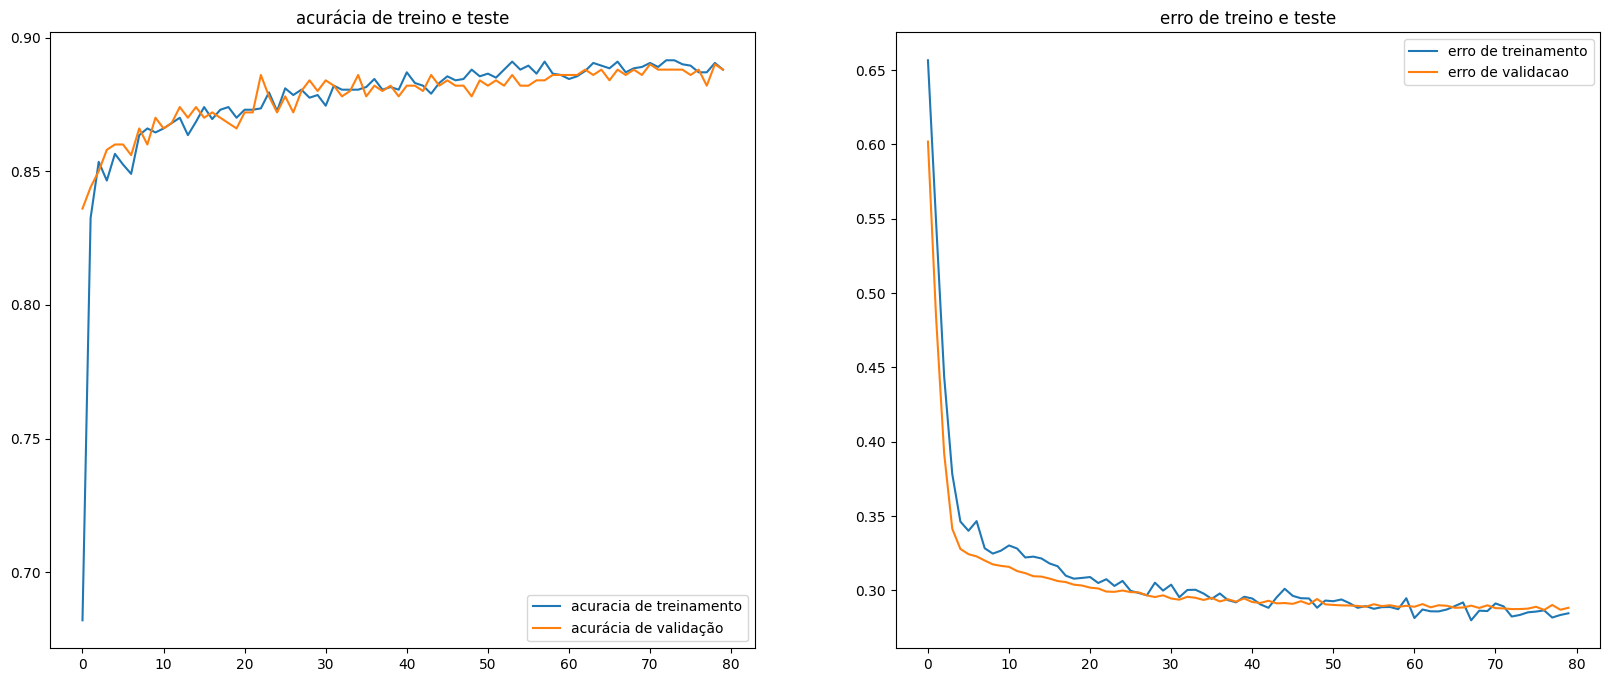

In [29]:
#validar o modelo

#visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

#plot acuracia
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='acuracia de treinamento')
plt.plot(epochs_range, val_acc, label= 'acurácia de validação')
plt.legend(loc='lower right')
plt.title('acurácia de treino e teste')

#plot erro de treinamento
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='erro de treinamento')
plt.plot(epochs_range, val_loss, label='erro de validacao')
plt.legend(loc='upper right')
plt.title('erro de treino e teste')

plt.show()

In [30]:
from sklearn.metrics import classification_report

#preditcions
y_pred = model.predict(x_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

#classification report
class_names = []
for i in y.unique():
  class_names.append(le.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names = class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
                   precision    recall  f1-score   support

(B) Ürgüp Sivrisi       0.88      0.91      0.89       257
  (A) Çerçevelik        0.90      0.87      0.88       243

         accuracy                           0.89       500
        macro avg       0.89      0.89      0.89       500
     weighted avg       0.89      0.89      0.89       500

